# Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Reading the data

In [2]:
df = pd.read_csv('dataframe_.csv')

In [3]:
df.head()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


# Information about the data

In [4]:
## shape of the data
print("shape of the data is {}".format(df.shape))

shape of the data is (1697, 2)


In [5]:
## summary statistics of the data
df.describe()

,input,output
count,1696.000000,1696.000000
mean,1.159933,-34.088017
std,79.005970,65.771112
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.195194,-50.470981
75%,70.264109,-11.000000
max,134.605775,134.425495


In [6]:
## cheaking for missing values
df.isnull().sum()

input     1
output    1
dtype: int64

In [7]:
## dropping the missing values
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

input     0
output    0
dtype: int64

In [9]:
## cheaking for duplicated values
df.duplicated().sum()

606

In [10]:
## cheaking data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1696 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 39.8 KB


# Exploratory Data Analysis

Text(0, 0.5, 'output')

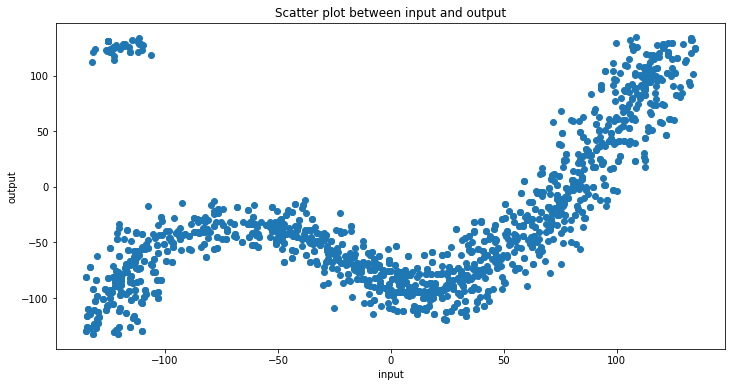

In [11]:
plt.figure(figsize=(12,6))
plt.scatter(x = 'input',y = 'output',data = df)
plt.title('Scatter plot between input and output')
plt.xlabel('input')
plt.ylabel('output')

# outlier detection

In [12]:
df.replace(list(df.loc[np.where((df['input']<-100 ) & (df['output']>100))]['output']),df['output'].median(),inplace=True)

Text(0, 0.5, 'output')

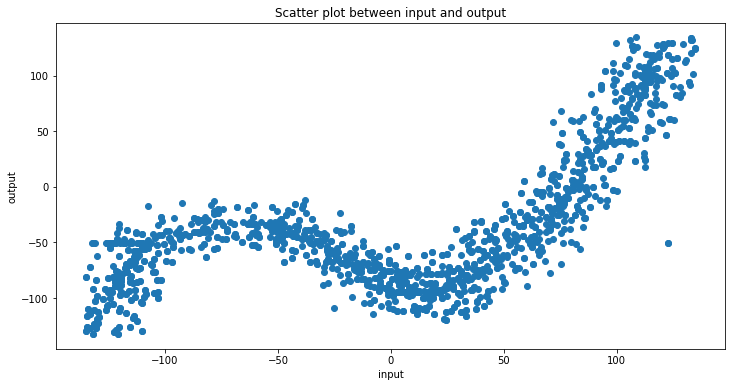

In [13]:
plt.figure(figsize=(12,6))
plt.scatter(x = 'input',y = 'output',data = df)
plt.title('Scatter plot between input and output')
plt.xlabel('input')
plt.ylabel('output')

<AxesSubplot:xlabel='input', ylabel='Density'>

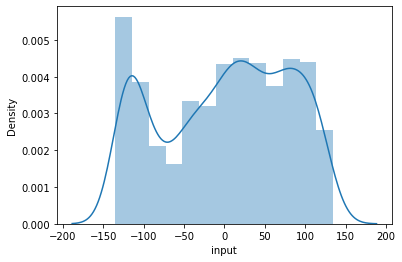

In [14]:
sns.distplot(df['input'])

<AxesSubplot:xlabel='output', ylabel='Density'>

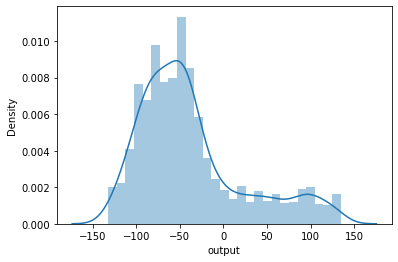

In [15]:
sns.distplot(df['output'])

# Feature Engineering

In [16]:
## deviding the data into X and y
X = df['input']
y = df['output']

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
X_train = np.array(X_train)
#y_train = np.array(y_train)
X_test = np.array(X_test)

In [19]:
## performing standard scaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train.reshape(len(X_train),1))
X_test_sc = sc.fit_transform(X_test.reshape(len(X_test),1))

# Model Building

###### (i)Linear Regression

In [20]:
lr = LinearRegression()
lr.fit(X_train_sc,y_train)
y_pred = lr.predict(X_test_sc)
r2_score(y_test,y_pred)

0.3813371736076293

Text(0, 0.5, 'output')

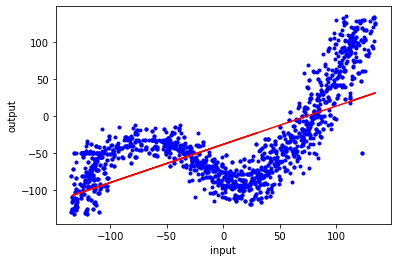

In [21]:
plt.plot(df['input'],df['output'],'b.')
plt.plot(X_test,y_pred,color = 'red')
plt.xlabel('input')
plt.ylabel('output')

###### (ii)Polynomial Regression

In [22]:
poly = PolynomialFeatures(degree=3)

In [23]:
X_train_trans = poly.fit_transform(X_train_sc)
X_test_trans = poly.fit_transform(X_test_sc)

In [24]:
print(X_train_trans[0])

[ 1.         -1.44239628  2.08050703 -3.00091561]


In [25]:
lr.fit(X_train_trans,y_train)
y_pred_poly = lr.predict(X_test_trans)
r2_score(y_test,y_pred_poly)

0.8251666294010865

###### Hyperparameter Tuning

In [26]:
param = [2,3,4,5,6,7,8,9]

In [27]:
r2_value = []
for i in param:
    poly = PolynomialFeatures(degree=i)
    X_train_trans = poly.fit_transform(X_train_sc)
    X_test_trans = poly.fit_transform(X_test_sc)
    lr.fit(X_train_trans,y_train)
    y_pred_poly = lr.predict(X_test_trans)
    r2_value.append(r2_score(y_test,y_pred_poly))

In [28]:
r2_value

[0.7050774673235636,
 0.8251666294010865,
 0.8628306210749281,
 0.8796748906359735,
 0.881525337099353,
 0.8819049155652096,
 0.8830478821005431,
 0.8819258229629294]

# Insights :
Here we get 8 degree polynomial is the best model to predict the output based on the input column as r2 score is high